# Problem statement

In [1]:
#The aim is to build a predictive model and find out the sales of each product at a particular store
#BigMart will try to understand the properties of products and 
#stores which play a key role in increasing sales.



# Hypothesis

In [2]:
## Store Level Hypotheses:

# City type (Y): Stores located in urban or Tier 1 cities should have higher sales because of the higher income levels of people there.
# Population Density (N): Stores located in densely populated areas should have higher sales because of more demand.
# Store Capacity (Y): Stores which are very big in size should have higher sales as they act like one-stop-shops and people would prefer getting everything from one place
# Competitors (N): Stores having similar establishments nearby should have less sales because of more competition.
# Marketing (N): Stores which have a good marketing division should have higher sales as it will be able to attract customers through the right offers and advertising.
# Location (Y) : Stores located within popular marketplaces should have higher sales because of better access to customers.
# Customer Behavior(N): Stores keeping the right set of products to meet the local needs of customers will have higher sales.
# Ambiance (N): Stores which are well-maintained and managed by polite and humble people are expected to have higher footfall and thus higher sales.


## Product Level Hypotheses:

# Brand (N): Branded products should have higher sales because of higher trust in the customer.
# Packaging (N): Products with good packaging can attract customers and sell more.
# Utility (Y): Daily use products should have a higher tendency to sell as compared to the specific use products.
# Display Area (Y): Products which are given bigger shelves in the store are likely to catch attention first and sell more.
# Visibility in Store (Y): The location of product in a store will impact sales. Ones which are right at entrance will catch the eye of customer first rather than the ones in back.
# Advertising (N): Better advertising of products in the store will should higher sales in most cases.
# Promotional Offers(N): Products accompanied with attractive offers and discounts will sell more.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Importing data

In [4]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# Combine train and test data

In [5]:
# Test data has no prediction variable, so adding one to keep a consistent shape

test['Item_Outlet_Sales'] = 0 

data = pd.concat([train, test], sort = False)
print(train.shape, test.shape, data.shape)


(8523, 12) (5681, 12) (14204, 12)


In [6]:
column_names = list(data.columns)
column_names

['Item_Identifier',
 'Item_Weight',
 'Item_Fat_Content',
 'Item_Visibility',
 'Item_Type',
 'Item_MRP',
 'Outlet_Identifier',
 'Outlet_Establishment_Year',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'Item_Outlet_Sales']

# Hypothesis vs variable

In [7]:
# 'Item_Identifier'- ID
#  'Item_Weight'not considered
#  'Item_Fat_Content'linked to Utility - daily use products are usually low fat
#  'Item_Visibility' linked to store capacity - large stores 
#  'Item_Type'linked to utility - feature engineering required to categorise items by daily and occasional 
#  'Item_MRP'- not considered
#  'Outlet_Identifier', - ID
#  'Outlet_Establishment_Year'- not considered
#  'Outlet_Size'linked to store capacity
#  'Outlet_Location_Type'- linked to store location
#  'Outlet_Type'- linked to store capacity
#  '

# Explore data

In [8]:
train.shape

(8523, 12)

In [9]:
test.shape

(5681, 12)

In [10]:
train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [11]:
test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,0
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1,0
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store,0
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1,0
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,0
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,0
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,0
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,0


In [12]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,12.792854,0.065953,141.004977,1997.830681,1308.865489
std,4.652502,0.051459,62.086938,8.371664,1699.791423
min,4.555000,0.000000,31.290000,1985.000000,0.000000
25%,8.710000,0.027036,94.012000,1987.000000,0.000000
50%,12.600000,0.054021,142.247000,1999.000000,559.272000
75%,16.750000,0.094037,185.855600,2004.000000,2163.184200
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


# Are they any missing values?

In [13]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

# What different data types are in the dataset?

In [14]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

# Understand relation between Outlet sales and categorical and numerical features

In [15]:
categorical_features = data.select_dtypes(include=[np.object])
categorical_features.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [16]:
numerical_features = data.select_dtypes(include=[np.number])
numerical_features.columns


Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

## Cat_cols vs Outlet_sales

In [17]:
#leaving out identifiers

cat_cols = [x for x in categorical_features if x not in ['Item_Identifier','Outlet_Identifier','source']]

cat_cols

len(cat_cols)

5

In [18]:
cat_cols

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [19]:
cat_cols

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [20]:
len(cat_cols)

5

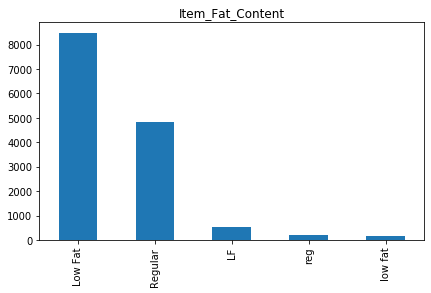

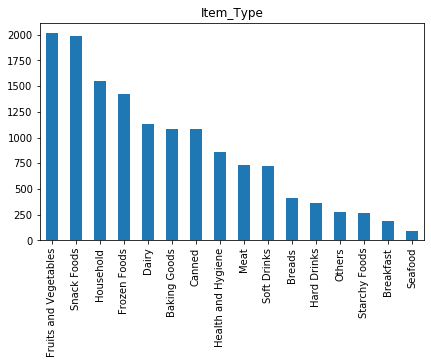

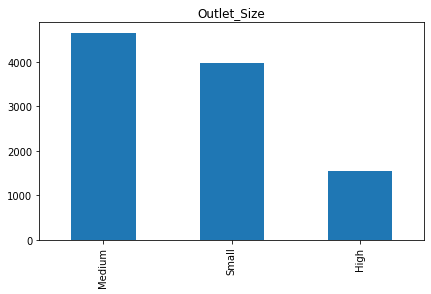

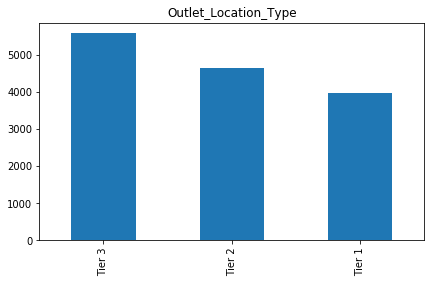

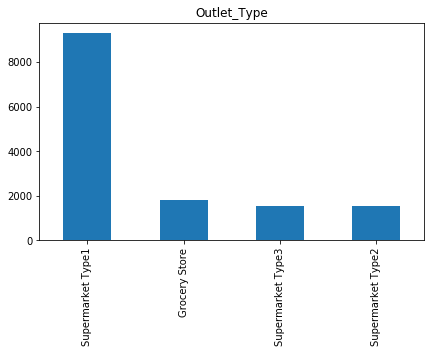

In [21]:
for i,col in enumerate(cat_cols):
    plt.figure(figsize=(40,4))
    plt.subplot(1,5,i+1)
    categorical_features[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.show()





# Relation between Categorical values & Outlet sales

In [22]:
len(cat_cols)

5

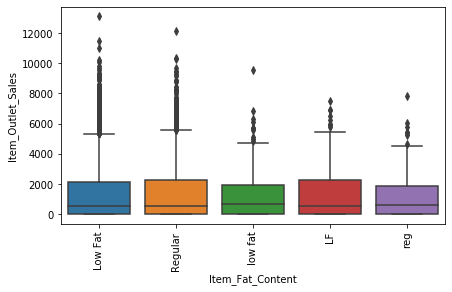

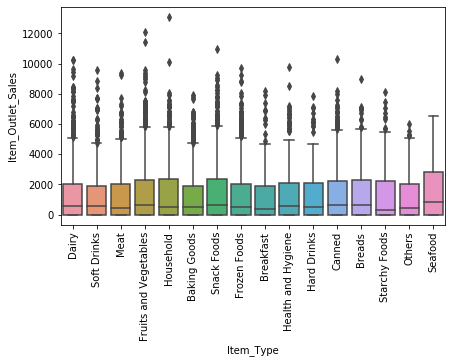

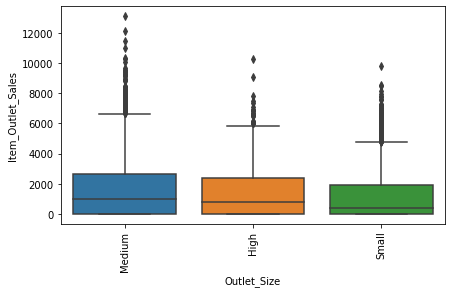

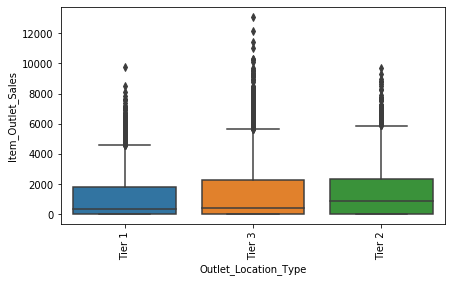

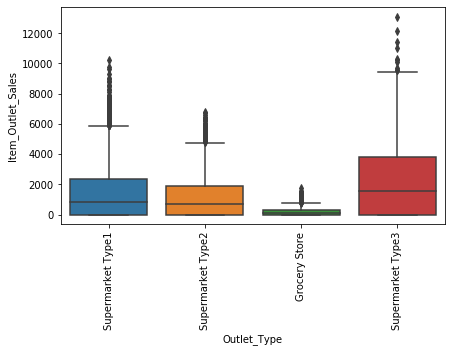

In [23]:
for i,col in enumerate(cat_cols):
    plt.figure(figsize=(40,4))
    plt.subplot(1,5,i+1)
    sns.boxplot(x=col, y='Item_Outlet_Sales', data=data)
    plt.xticks(rotation=90)
    plt.show()

# Num_cols vs Outlet_sales

In [24]:
numerical_features

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,3735.1380
1,5.92,0.019278,48.2692,2009,443.4228
2,17.50,0.016760,141.6180,1999,2097.2700
3,19.20,0.000000,182.0950,1998,732.3800
4,8.93,0.000000,53.8614,1987,994.7052
...,...,...,...,...,...
5676,10.50,0.013496,141.3154,1997,0.0000
5677,7.60,0.142991,169.1448,2009,0.0000
5678,10.00,0.073529,118.7440,2002,0.0000
5679,15.30,0.000000,214.6218,2007,0.0000


In [25]:
num_cols = ['Outlet_Establishment_Year']

In [26]:
len(num_cols)

1

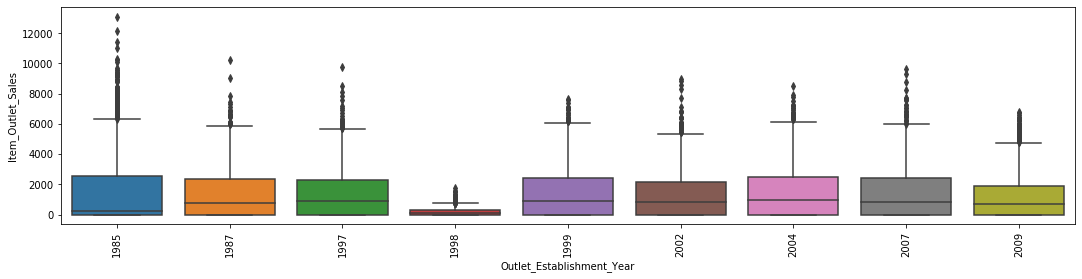

In [27]:
for i,col in enumerate(num_cols):
    plt.figure(figsize=(40,4))
    plt.subplot(1,2,i+1)
    sns.boxplot(x=col, y='Item_Outlet_Sales', data=data)
    plt.xticks(rotation=90)
    plt.show()

# Data preprocessing

## Dealing with missing values

In [28]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [29]:
data['Outlet_Size']

0       Medium
1       Medium
2       Medium
3          NaN
4         High
         ...  
5676     Small
5677    Medium
5678       NaN
5679       NaN
5680       NaN
Name: Outlet_Size, Length: 14204, dtype: object

In [30]:
weight_mean = data['Item_Weight'].mean()
data['Item_Weight'].fillna(weight_mean,inplace=True)

In [31]:
data['Item_Weight'].isnull().sum()

0

In [32]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

# We need to impute Outlet_Size mode for each Outlet_type

In [33]:
#Import mode function:
from scipy.stats import mode

#Determing the mode for each
outlet_size_mode = data.pivot_table(values='Outlet_Size', columns='Outlet_Type',aggfunc=(lambda x:mode(x).mode[0]) )
print ('Mode for each Outlet_Type:')
print(outlet_size_mode)
#Get a boolean variable specifying missing Item_Weight values
miss_bool = data['Outlet_Size'].isnull() 

#Impute data and check #missing values before and after imputation to confirm
print('\nOriginal #missing: %d'% sum(miss_bool))
data.loc[miss_bool,'Outlet_Size'] = data.loc[miss_bool,'Outlet_Type'].apply(lambda x: outlet_size_mode[x])
print ('Missing after imputing: {}'.format(sum(data['Outlet_Size'].isnull())))

Mode for each Outlet_Type:
Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  

Original #missing: 4016
Missing after imputing: 0


In [34]:
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

# Feature engineering

## Some observations

In [35]:
# Looking at the data we can see,

    # 'Low fat' is sometimes tagges as 'LF' and 'low fat'
    # Some of the 'Regular' are mentioned as 'reg'
    # Some of the 'item_types' are less in count, might benefit from combining: eg bread can be combined with breakfast
    # Supermarket 2 and 3 can be combined


## Actions

In [36]:
# Combine supermarket2 and 3
# Item visibility is zero for some items, which makes no sense
# Combine Low Fat , lf and other variants
# Combine Regular and Reg
# Combine less frequent items

## Should we combine supermarket 2 and 3?

In [37]:
data.pivot_table(values='Item_Outlet_Sales', index='Outlet_Type',aggfunc='mean')

,Item_Outlet_Sales
Outlet_Type,
Grocery Store,203.897100
Supermarket Type1,1389.858216
Supermarket Type2,1197.815543
Supermarket Type3,2215.475338


The average is too different, so these should not be combined

## Deal with item zero visibility

Item having zero visibility makes no senses. Therefore we need to address this. The best way to address this is to treat as a missing value

In [38]:
data['Item_Visibility']

0       0.016047
1       0.019278
2       0.016760
3       0.000000
4       0.000000
          ...   
5676    0.013496
5677    0.142991
5678    0.073529
5679    0.000000
5680    0.104720
Name: Item_Visibility, Length: 14204, dtype: float64

In [39]:
# Let's treat visibility zero as missing value

In [40]:
visibility_avg = data.pivot_table(values='Item_Visibility', index='Item_Identifier')


In [41]:
#Impute 0 values with mean visibility of that product:
miss_bool = (data['Item_Visibility'] == 0)



In [42]:
print('Number of 0 values before:{}'.format(sum(miss_bool)))
data.loc[miss_bool,'Item_Visibility'] = data.loc[miss_bool,'Item_Identifier'].apply(lambda x: visibility_avg.loc[x])
print('Number of 0 values after:{}'.format(sum(data['Item_Visibility']==0)))


Number of 0 values before:879
Number of 0 values after:0


## Calculate Item visibility mean ration

We hypothesized that products with higher visibility are likely to sell more. But along with comparing products on absolute terms, we should look at the visibility of the product in that particular store as compared to the mean visibility of that product across all stores. 

In [43]:
data['Item_Visibility_MeanRatio'] = data.apply(lambda x: x['Item_Visibility']/visibility_avg.loc[x['Item_Identifier']],axis=1)

In [44]:
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Visibility_MeanRatio
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,0.931078
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,0.933420
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,0.960069
3,FDX07,19.20,Regular,0.017834,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,1.000000
4,NCD19,8.93,Low Fat,0.009780,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,0.0000,0.874729
5677,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,0.0000,0.878292
5678,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Small,Tier 2,Supermarket Type1,0.0000,1.162245
5679,FDJ26,15.30,Regular,0.088380,Canned,214.6218,OUT017,2007,Small,Tier 2,Supermarket Type1,0.0000,1.000000


In [45]:
data['Item_Visibility_MeanRatio'].describe()

count    14204.000000
mean         1.061884
std          0.235907
min          0.844563
25%          0.925131
50%          0.999070
75%          1.042007
max          3.010094
Name: Item_Visibility_MeanRatio, dtype: float64

## Rolling up products into broader categories

In [46]:
data['Item_Category'] = data['Item_Identifier'].apply(lambda x: x[0:2])

In [47]:
data['Item_Category']

0       FD
1       DR
2       FD
3       FD
4       NC
        ..
5676    FD
5677    FD
5678    NC
5679    FD
5680    FD
Name: Item_Category, Length: 14204, dtype: object

In [48]:
data['Item_Category'] = data['Item_Category'].map({'FD':'Food',
                                                  'DR':'Drink',
                                                  'NC':'Non-consumable'})

In [49]:
data['Item_Category']

0                 Food
1                Drink
2                 Food
3                 Food
4       Non-consumable
             ...      
5676              Food
5677              Food
5678    Non-consumable
5679              Food
5680              Food
Name: Item_Category, Length: 14204, dtype: object

In [50]:
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Visibility_MeanRatio,Item_Category
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,0.931078,Food
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,0.933420,Drink
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,0.960069,Food
3,FDX07,19.20,Regular,0.017834,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,1.000000,Food
4,NCD19,8.93,Low Fat,0.009780,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,1.000000,Non-consumable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,0.0000,0.874729,Food
5677,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,0.0000,0.878292,Food
5678,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Small,Tier 2,Supermarket Type1,0.0000,1.162245,Non-consumable
5679,FDJ26,15.30,Regular,0.088380,Canned,214.6218,OUT017,2007,Small,Tier 2,Supermarket Type1,0.0000,1.000000,Food


## Combine Fat content categories

In [51]:
data['Item_Fat_Content'].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [52]:
data['Item_Fat_Content']=data['Item_Fat_Content'].replace({'LF':'Low Fat',
                                                      'low fat': 'Low Fat',
                                                      'reg':'Regular'})

In [58]:
data['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [61]:
#Mark non-edibles as separate category in low_fat:
data.loc[data['Item_Category']=="Non-consumable",'Item_Fat_Content'] = "Non-Edible"
data['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

## Outlet years of operation

In [62]:
data['Outlet_Years'] = 2013 - data['Outlet_Establishment_Year']

In [63]:
data['Outlet_Years'].describe()

count    14204.000000
mean        15.169319
std          8.371664
min          4.000000
25%          9.000000
50%         14.000000
75%         26.000000
max         28.000000
Name: Outlet_Years, dtype: float64

In [64]:
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Visibility_MeanRatio,Item_Category,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,0.931078,Food,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,0.933420,Drink,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,0.960069,Food,14
3,FDX07,19.20,Regular,0.017834,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,1.000000,Food,15
4,NCD19,8.93,Non-Edible,0.009780,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,1.000000,Non-consumable,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,0.0000,0.874729,Food,16
5677,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,0.0000,0.878292,Food,4
5678,NCO17,10.00,Non-Edible,0.073529,Health and Hygiene,118.7440,OUT045,2002,Small,Tier 2,Supermarket Type1,0.0000,1.162245,Non-consumable,11
5679,FDJ26,15.30,Regular,0.088380,Canned,214.6218,OUT017,2007,Small,Tier 2,Supermarket Type1,0.0000,1.000000,Food,6


## Data Encoding

In [65]:
from sklearn.preprocessing import LabelEncoder

In [66]:
le = LabelEncoder()

In [67]:
data['Outlet'] = le.fit_transform(data['Outlet_Identifier'])

In [69]:
data = pd.get_dummies(data,columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Category'])

In [70]:
data.dtypes

Item_Identifier                   object
Item_Weight                      float64
Item_Visibility                  float64
Item_Type                         object
Item_MRP                         float64
Outlet_Identifier                 object
Outlet_Establishment_Year          int64
Item_Outlet_Sales                float64
Item_Visibility_MeanRatio        float64
Outlet_Years                       int64
Outlet                             int64
Item_Fat_Content_Low Fat           uint8
Item_Fat_Content_Non-Edible        uint8
Item_Fat_Content_Regular           uint8
Outlet_Location_Type_Tier 1        uint8
Outlet_Location_Type_Tier 2        uint8
Outlet_Location_Type_Tier 3        uint8
Outlet_Size_High                   uint8
Outlet_Size_Medium                 uint8
Outlet_Size_Small                  uint8
Outlet_Type_Grocery Store          uint8
Outlet_Type_Supermarket Type1      uint8
Outlet_Type_Supermarket Type2      uint8
Outlet_Type_Supermarket Type3      uint8
Item_Category_Dr

In [71]:
data[['Item_Fat_Content_Low Fat','Item_Fat_Content_Non-Edible','Item_Fat_Content_Regular']].head(5)

,Item_Fat_Content_Low Fat,Item_Fat_Content_Non-Edible,Item_Fat_Content_Regular
0,1,0,0
1,0,0,1
2,1,0,0
3,0,0,1
4,0,1,0


In [72]:
data

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Visibility_MeanRatio,Outlet_Years,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Category_Drink,Item_Category_Food,Item_Category_Non-consumable
0,FDA15,9.30,0.016047,Dairy,249.8092,OUT049,1999,3735.1380,0.931078,14,...,0,1,0,0,1,0,0,0,1,0
1,DRC01,5.92,0.019278,Soft Drinks,48.2692,OUT018,2009,443.4228,0.933420,4,...,0,1,0,0,0,1,0,1,0,0
2,FDN15,17.50,0.016760,Meat,141.6180,OUT049,1999,2097.2700,0.960069,14,...,0,1,0,0,1,0,0,0,1,0
3,FDX07,19.20,0.017834,Fruits and Vegetables,182.0950,OUT010,1998,732.3800,1.000000,15,...,0,0,1,1,0,0,0,0,1,0
4,NCD19,8.93,0.009780,Household,53.8614,OUT013,1987,994.7052,1.000000,26,...,1,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.50,0.013496,Snack Foods,141.3154,OUT046,1997,0.0000,0.874729,16,...,0,0,1,0,1,0,0,0,1,0
5677,FDD47,7.60,0.142991,Starchy Foods,169.1448,OUT018,2009,0.0000,0.878292,4,...,0,1,0,0,0,1,0,0,1,0
5678,NCO17,10.00,0.073529,Health and Hygiene,118.7440,OUT045,2002,0.0000,1.162245,11,...,0,0,1,0,1,0,0,0,0,1
5679,FDJ26,15.30,0.088380,Canned,214.6218,OUT017,2007,0.0000,1.000000,6,...,0,0,1,0,1,0,0,0,1,0


In [73]:
# Drop columns which have been converted

In [75]:
data.drop(['Item_Type','Outlet_Establishment_Year'], axis=1,inplace=True)

In [76]:
data

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Item_Outlet_Sales,Item_Visibility_MeanRatio,Outlet_Years,Outlet,Item_Fat_Content_Low Fat,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Category_Drink,Item_Category_Food,Item_Category_Non-consumable
0,FDA15,9.30,0.016047,249.8092,OUT049,3735.1380,0.931078,14,9,1,...,0,1,0,0,1,0,0,0,1,0
1,DRC01,5.92,0.019278,48.2692,OUT018,443.4228,0.933420,4,3,0,...,0,1,0,0,0,1,0,1,0,0
2,FDN15,17.50,0.016760,141.6180,OUT049,2097.2700,0.960069,14,9,1,...,0,1,0,0,1,0,0,0,1,0
3,FDX07,19.20,0.017834,182.0950,OUT010,732.3800,1.000000,15,0,0,...,0,0,1,1,0,0,0,0,1,0
4,NCD19,8.93,0.009780,53.8614,OUT013,994.7052,1.000000,26,1,0,...,1,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.50,0.013496,141.3154,OUT046,0.0000,0.874729,16,8,0,...,0,0,1,0,1,0,0,0,1,0
5677,FDD47,7.60,0.142991,169.1448,OUT018,0.0000,0.878292,4,3,0,...,0,1,0,0,0,1,0,0,1,0
5678,NCO17,10.00,0.073529,118.7440,OUT045,0.0000,1.162245,11,7,0,...,0,0,1,0,1,0,0,0,0,1
5679,FDJ26,15.30,0.088380,214.6218,OUT017,0.0000,1.000000,6,2,0,...,0,0,1,0,1,0,0,0,1,0


In [77]:
data.to_csv("data_cleaned.csv",index=False)